In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.analysis.plotting import plot_comparison, barplot_comparison
from cdi.util.analysis.eval import (compute_avg_loglikelihood_w_std_err,
                                    compute_param_error,
                                    load_model_params)

## Analysis setup

### Global settings

In [6]:
data_name = 'toy_set3'
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
    'm2019050811_d2020032511_20200406_20200407',
    'm2019050822_d2020032522_20200406_20200407',
    'm2019050833_d2020032533_20200406_20200407',
    'm2019050844_d2020032544_20200406_20200407',
]

### Templates

In [7]:
log_path_base = f'../../trained_models/{data_name}/learning_experiments'

## Helpers

In [8]:
# ggplot
# colors = ['#000000', '#E24A33', '#988ED5', '#FBC15E', '#348ABD', '#FFB5B8', '#777777', '#8EBA42',]
colors = ['#000000', '#E24A33', '#FBC15E', '#348ABD', '#8EBA42','#FFB5B8']

## Generative model analysis

### Log-likelihood analysis

For each method train a number of models using the same complete dataset but different missingness generated by changing only the random seed for the missingness generator. The fitted models are then used to compute fully-observed average log-likelihood on a held-out test dataset. Finally, the results from different seeds are averaged and standard error is computed.

In [10]:
suite = {
#     'Complete + MLE': 'fa_complete_data',
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
#     'VGI svar': 'fa_pretrained_svar_cdi',
#     'VGI svar rlx': 'fa_pretrained_svarrlx_cdi',
    'MICE': 'fa_mice_baseline_mi5',
    'MICE ens': 'fa_mice_baseline_mi5_ensamble',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline_mi5',
}
groups = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


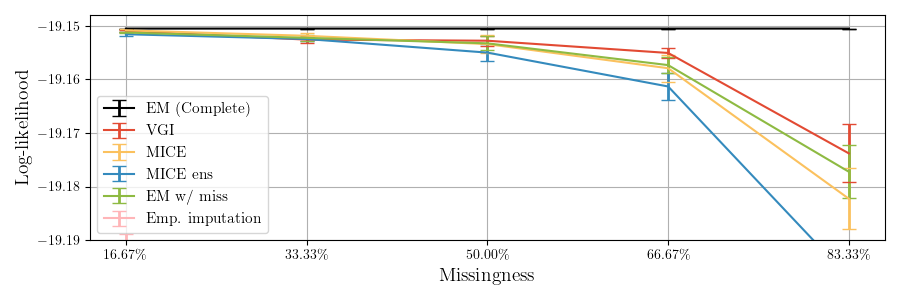

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))

stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                          seeds=exp_seed_keys,
                                                          groups=groups,
                                                          base_path=log_path_base)

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('test_log_lik',),  
                err_keys=('test_log_lik_stderr',),
                xlabel='Missingness',
                ylabel='Log-likelihood', 
                colors=colors,
                ylim=(-19.190, -19.148))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

<IPython.core.display.Javascript object>


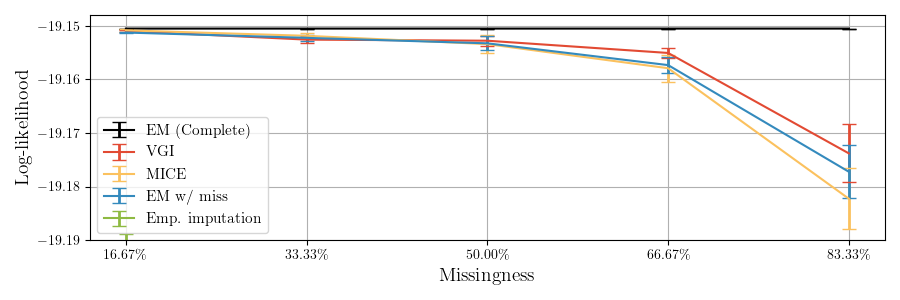

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))

stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                          seeds=exp_seed_keys,
                                                          groups=groups,
                                                          base_path=log_path_base)

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('test_log_lik',),  
                err_keys=('test_log_lik_stderr',),
                xlabel='Missingness',
                ylabel='Log-likelihood', 
                colors=colors,
                ylim=(-19.190, -19.148))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

In [12]:
# fig.savefig('figures/toy_mcar_test_loglik.pdf', bbox_inches='tight')

#### Bar-plot

In [13]:
suite_line = {
    'EM (Complete)': 'fa_em_complete'
}

suite_bar = {
    'VGI': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
    'MICE': 'fa_mice_baseline_mi5',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline_mi5',
}
groups = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


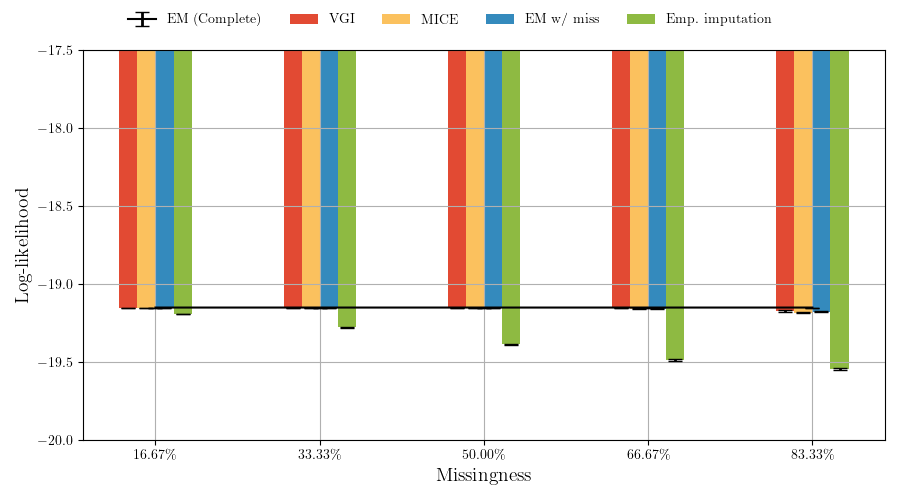

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))

stats_line = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite_line.items():
    stats_line[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                              seeds=exp_seed_keys,
                                                              groups=groups,
                                                         base_path=log_path_base)
plot_comparison(axes, stats_line,
                x_metric_key='group',
                y_metric_keys=('test_log_lik',),  
                err_keys=('test_log_lik_stderr',),
                xlabel='Missingness',
                ylabel='Log-likelihood', 
                colors=colors,
#                 ylim=(450, 1200)
               )
    
stats_bar = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite_bar.items():
    stats_bar[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                              seeds=exp_seed_keys,
                                                              groups=groups,
                                                              base_path=log_path_base)

barplot_comparison(axes, stats_bar, width=0.11,
                    x_metric_key='group',
                    y_metric_keys=('test_log_lik',),  
                    err_keys=('test_log_lik_stderr',),
                    xlabel='Missingness',
                    ylabel='Log-likelihood', 
                    colors=colors[1:],
                    ylim=(-20, -17.5),
#                       gap=0.02, gap_idx=1
                  )

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

axes.grid()

fig.tight_layout(rect=(0, 0, 1, 0.94))

axes.legend(ncol=5, bbox_to_anchor=(0.5, 0.96), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

### EM log-likelihood bias

In [9]:
suite = {
    'True': 'fa_ground_truth_cdi',
    'EM complete': 'fa_em_complete',
    'EM joint': 'fa_em_joint',
    'EM independent': 'fa_em_indep'
}
groups = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


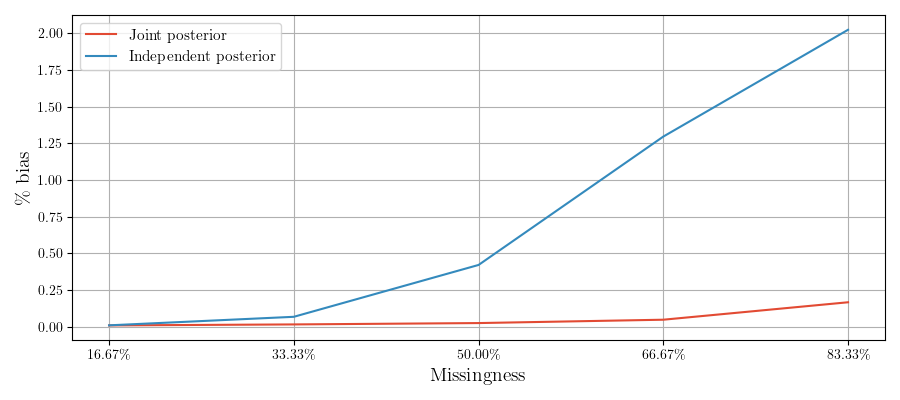

/home/vaidas/Projects/cumulative-data-imputation/cdi/util/analysis/eval.py:122: RuntimeWarning: invalid value encountered in sqrt
  cov_bures = np.sqrt(np.trace(cov_truth + cov


In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# axes.set(title=f'Test log-likelihood')

# stats = {}
# # Load stats for every experiment in the suite
# for exp_name, model_name in suite.items():
#     stats[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
#                                                           seeds=exp_seed_keys,
#                                                           groups=groups,
#                                                           base_path=log_path_base)

stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
                                          checkpoints='last')


def calc_loglik_percent_bias(stats, incomplete, complete, metric):
    true = np.array(stats[complete][metric])
    return 100*np.abs((np.array(stats[incomplete][metric]) - true)/true)


    
bias = {
    'Joint posterior': {},
    'Independent posterior': {}
}
bias['Joint posterior']['bias'] = calc_loglik_percent_bias(stats, 'EM joint', 'True', 'crossent_avg')
bias['Joint posterior']['group'] = stats['EM joint']['group']
bias['Independent posterior']['bias'] = calc_loglik_percent_bias(stats, 'EM independent', 'True', 'crossent_avg')
bias['Independent posterior']['group'] = stats['EM independent']['group']


plot_comparison(axes, bias, 
                x_metric_key='group',
                y_metric_keys=('bias',),  
                err_keys=(None,),
                xlabel='Missingness',
                colors=[colors[1], colors[3]],
                ylabel='\\% bias')

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

In [17]:
# fig.savefig('figures/toy_em_bias.pdf', bbox_inches='tight')

### Learnt parameter analysis

In [9]:
suite = {
#     'Complete + MLE': 'fa_complete_data',
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
#     'VGI svar': 'fa_pretrained_svar_cdi',
#     'VGI svar rlx': 'fa_pretrained_svarrlx_cdi',
    'MICE': 'fa_mice_baseline_mi5',
#     'MICE avg': 'fa_mice_baseline_mi5_avg',
#     'MICE ens': 'fa_mice_baseline_mi5_ensamble',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline_mi5',
}
groups = [1, 2, 3, 4, 5]

In [10]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
#                                           checkpoints='best')
                                          checkpoints='last')

#### $\mu$ RMSE

<IPython.core.display.Javascript object>


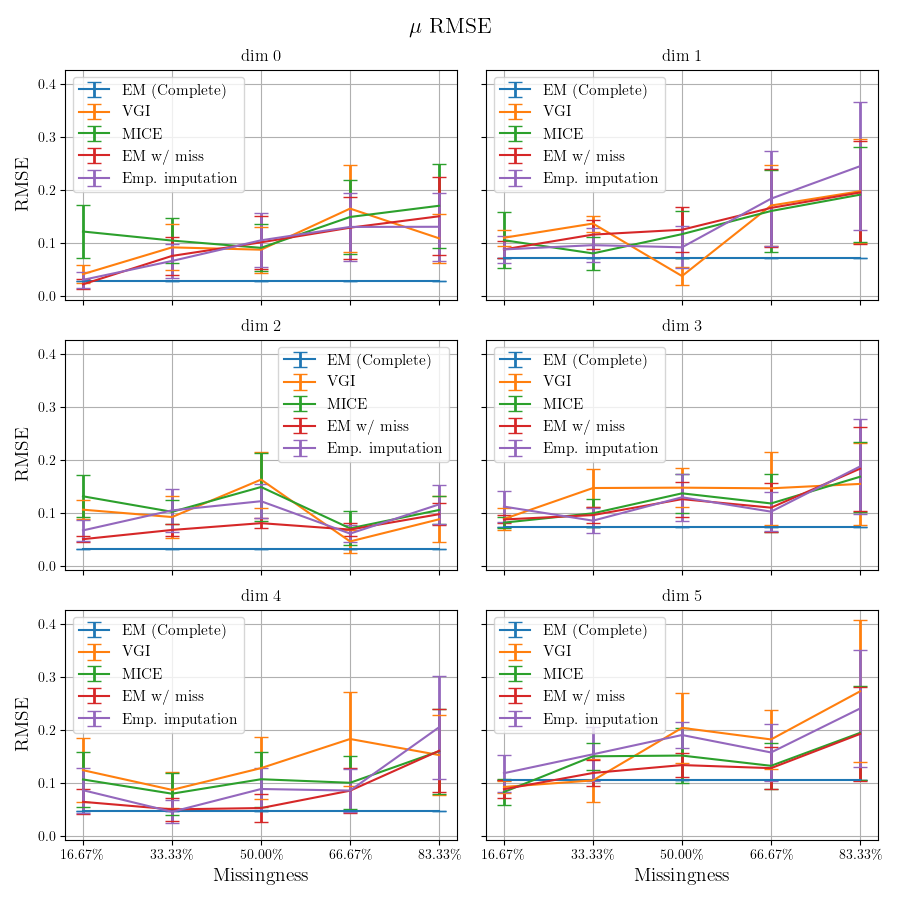

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(9, 9))
fig.suptitle('$\\mathbf{\\mu}$ RMSE', fontsize=16)
axes = axes.flatten()
for i in range(6):
    if i in (0,2,4):
        ylabel = 'RMSE'
    else:
        ylabel = None

    if i in (4,5):
        xlabel = 'Missingness'
    else:
        xlabel = None
        
    axes[i].set(title=f'dim {i}')
    plot_comparison(axes[i], stats, 
                    x_metric_key='group',
                    y_metric_keys=('mean_rmse',),
                    y_metric_dim=i,
                    err_keys=('mean_std_err',),
                    err_metric_dim=i,
                    xlabel=xlabel,
                    ylabel=ylabel, 
                    ylim=None)
#                     legend=i==0)

    axes[i].set_xticks(groups)
    axes[i].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

#### $\sigma$ RMSE

<IPython.core.display.Javascript object>


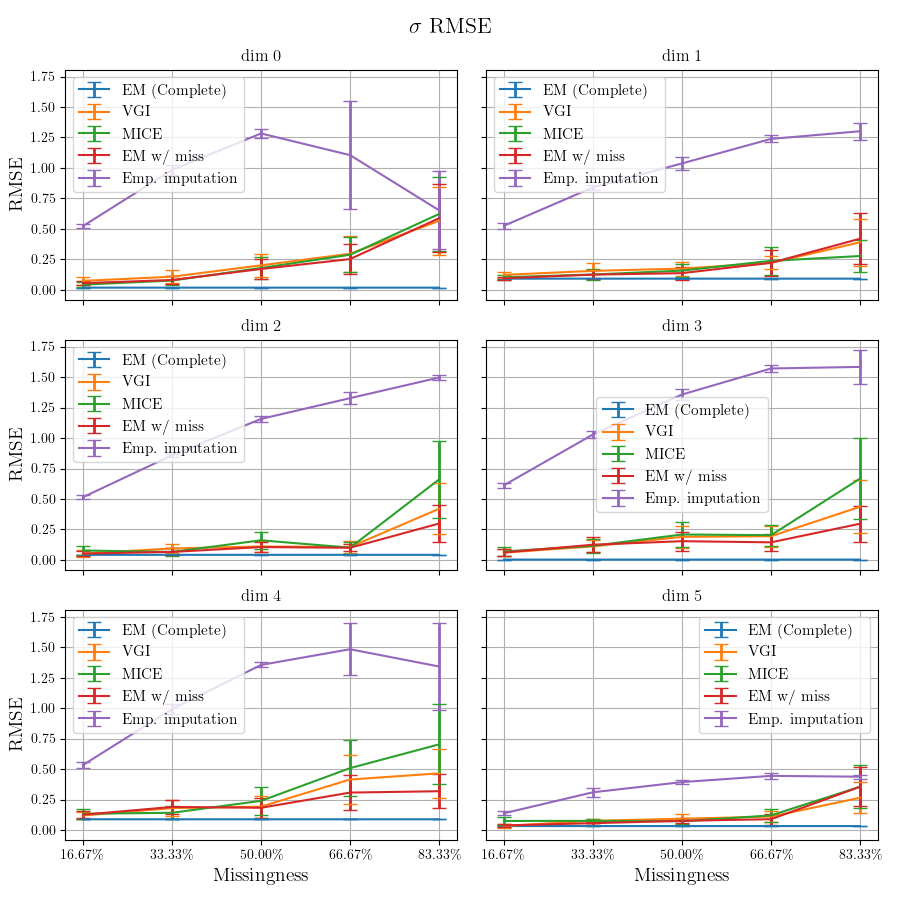

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(9, 9))
fig.suptitle('$\\mathbf{\\sigma}$ RMSE', 
             fontsize=16)
axes = axes.flatten()
for i in range(6):
    if i in (0,2,4):
        ylabel = 'RMSE'
    else:
        ylabel = None

    if i in (4,5):
        xlabel = 'Missingness'
    else:
        xlabel = None
        
    axes[i].set(title=f'dim {i}')
    plot_comparison(axes[i], stats, 
                    x_metric_key='group',
                    y_metric_keys=('std_rmse',),
                    y_metric_dim=i,
                    err_keys=('std_std_err',),
                    err_metric_dim=i,
                    xlabel=xlabel,
                    ylabel=ylabel, 
                    ylim=None)
#                     legend=i==0)

    axes[i].set_xticks(groups)
    axes[i].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

#### Bures distance of $\Sigma$

<IPython.core.display.Javascript object>


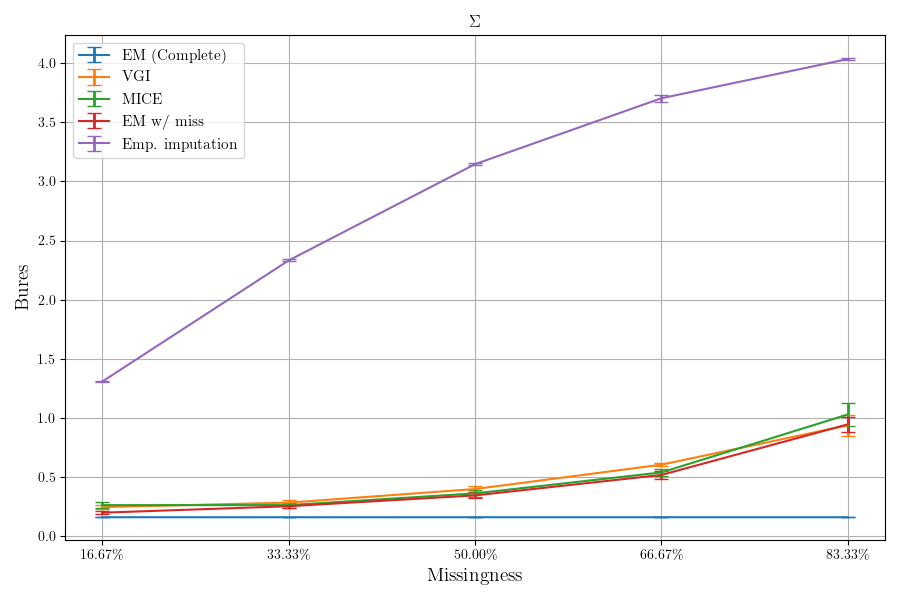

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axes.set(title=f'$\\Sigma$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('cov_bures_avg',),  
                err_keys=('cov_bures_std_err',),
                xlabel='Missingness',
                ylabel='Bures', 
                ylim=None)

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

#### Wasserstein distance

<IPython.core.display.Javascript object>


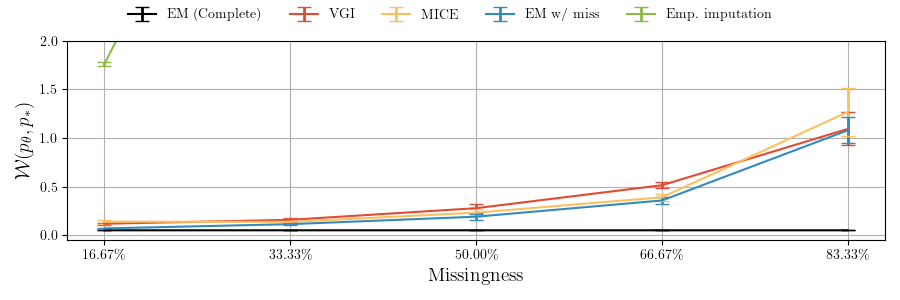

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('W_avg',),  
                err_keys=('W_std_err',),
                xlabel='Missingness',
                ylabel='$\\mathcal{W}(p_{\\mathbf{\\theta}}, p_*)$', 
                ylim=(-0.05, 2.0),
               colors=colors)

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

fig.tight_layout(rect=(0, 0, 1, 0.93))

axes.legend(ncol=5, bbox_to_anchor=(0.5, 0.95), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

In [23]:
# fig.savefig('figures/toy_mcar_wass_dist.pdf', bbox_inches='tight')

#### $D_\text{KL}$

<IPython.core.display.Javascript object>


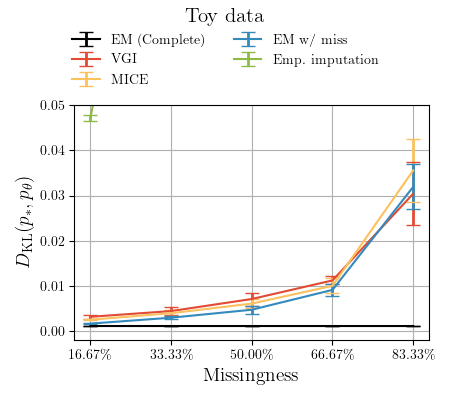

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors,
                ylim=(-0.002, 0.05))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

fig.suptitle('Toy data', fontsize=15)

fig.tight_layout(rect=(0, 0, 1, 0.87))

axes.legend(ncol=2, bbox_to_anchor=(0.5, 0.85), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

In [12]:
print('VGI')
print('Avg: ', stats['VGI']['KLD_avg'])
print('Std err: ', stats['VGI']['KLD_std_err'])
print('Top ', stats['VGI']['KLD_avg'] + stats['VGI']['KLD_std_err'])
print('Bottom ', stats['VGI']['KLD_avg'] - stats['VGI']['KLD_std_err'])

VGI
Avg:  [0.0031817  0.00444834 0.00711517 0.01123359 0.03041579]
Std err:  [0.00047559 0.00097138 0.0014347  0.00088122 0.00697686]
Top  [0.00365729 0.00541972 0.00854987 0.01211481 0.03739265]
Bottom  [0.00270611 0.00347696 0.00568047 0.01035238 0.02343894]


In [13]:
print('MICE')
print('Avg: ', stats['MICE']['KLD_avg'])
print('Std err: ', stats['MICE']['KLD_std_err'])
print('Top ', stats['MICE']['KLD_avg'] + stats['MICE']['KLD_std_err'])
print('Bottom ', stats['MICE']['KLD_avg'] - stats['MICE']['KLD_std_err'])

MICE
Avg:  [0.00253141 0.00398133 0.00610662 0.01003022 0.03557101]
Std err:  [0.00012414 0.00067502 0.00104615 0.00165884 0.00705508]
Top  [0.00265555 0.00465636 0.00715277 0.01168906 0.04262609]
Bottom  [0.00240727 0.00330631 0.00506048 0.00837138 0.02851593]


In [77]:
# fig.savefig('figures/toy_mcar_kldiv_small.pdf', bbox_inches='tight')

### Shared vs individual posterior distances

In [11]:
suite = {
    'VCDI': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
    'VCDI shared': 'fa_pretrained_svar_cdi',
    'VCDI shared relaxed': 'fa_pretrained_svarrlx_cdi',
}
groups = [1, 2, 3, 4, 5]

In [12]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
                                          checkpoints='best')

In [18]:
colors[1:2] + colors[3:5]

['#E24A33', '#348ABD', '#8EBA42']

<IPython.core.display.Javascript object>


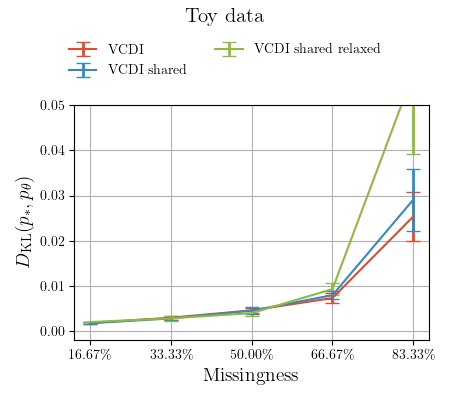

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors[1:2] + colors[3:5],
                ylim=(-0.002, 0.05))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

fig.suptitle('Toy data', fontsize=15)

fig.tight_layout(rect=(0, 0, 1, 0.87))

axes.legend(ncol=2, bbox_to_anchor=(0.5, 0.85), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

### MICE stacked vs params averaged

In [78]:
suite = {
    'MICE stacked avg-log': 'fa_mice_baseline_mi5',
    'MICE avg. params': 'fa_mice_baseline_mi5_ensamble',
#     'MICE stacked log-avg': 'fa_mice_baseline_mi5_logavgexp',
}
groups = [1, 2, 3, 4, 5]

In [70]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
                                          checkpoints='last',
                                          mi_avg_params=True)

<IPython.core.display.Javascript object>


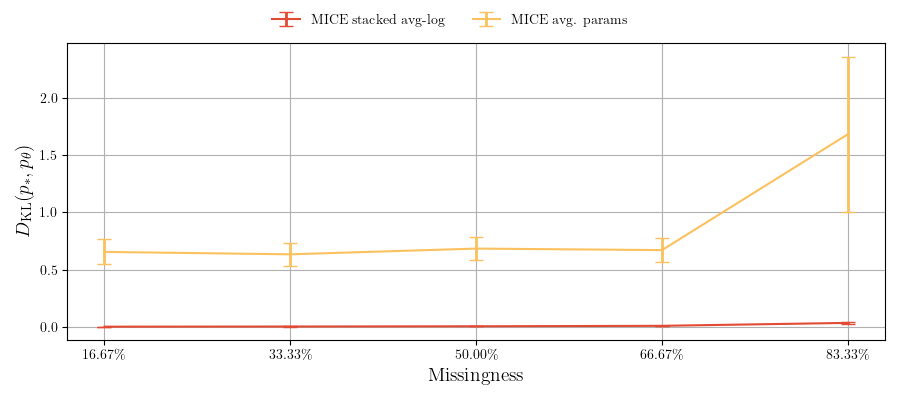

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors[1:],
               )
#                 ylim=(-0.002, 0.05))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

fig.tight_layout(rect=(0, 0, 1, 0.93))

axes.legend(ncol=5, bbox_to_anchor=(0.5, 0.95), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

In [72]:
# fig.savefig('figures/toy_mcar_kldiv_mice_stacked_vs_avg_params.pdf', bbox_inches='tight')

#### Plot Gaussians

<IPython.core.display.Javascript object>


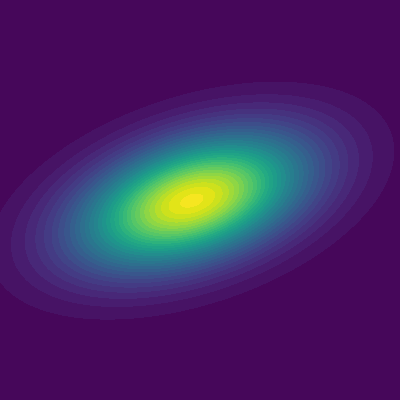

(-18.0, 17.9, -18.0, 17.9)

In [120]:
ppath = f'{log_path_base}/3/fa_mice_baseline_mi5/{exp_seed_keys[0]}/saved_models/last.ckpt'

mean, log_cov, F = load_model_params(ppath, avg_params=False)

# Only show 2 dims
mean = mean[1:3]
cov = (F @ F.T + np.diag(np.exp(log_cov)))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
# plt.savefig('slide-figures/Gaussian.pdf')

##### Averaged

<IPython.core.display.Javascript object>


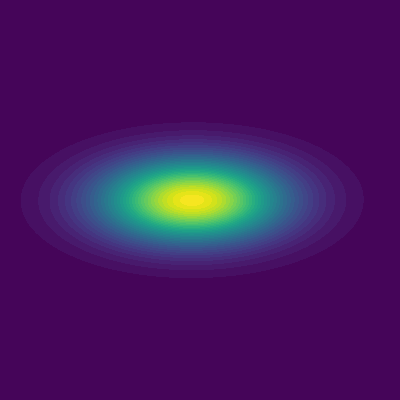

In [127]:
ppath = f'{log_path_base}/3/fa_mice_baseline_mi5_ensamble/{exp_seed_keys[0]}/saved_models/last.ckpt'

mean, log_cov, F = load_model_params(ppath, avg_params=True)

# Only show 2 dims
mean = mean[1:3]
cov = (F @ F.T + np.diag(np.exp(log_cov)))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
# plt.savefig('../slide-figures/FA_averaged.png')

##### Before averaging

In [128]:
ppath = f'{log_path_base}/3/fa_mice_baseline_mi5_ensamble/{exp_seed_keys[0]}/saved_models/last.ckpt'

params = load_model_params(ppath, avg_params=False)
means, log_covs, Fs = list(zip(*params))

<IPython.core.display.Javascript object>


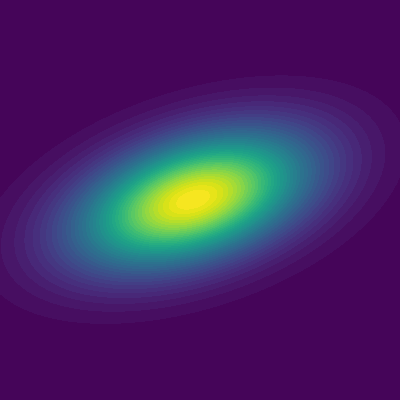

In [129]:
i = 0
# Only show 2 dims
mean = means[i][1:3]
cov = (Fs[i] @ Fs[i].T + np.diag(np.exp(log_covs[i])))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# plt.savefig('../slide-figures/FA_before_avg1.png')

<IPython.core.display.Javascript object>


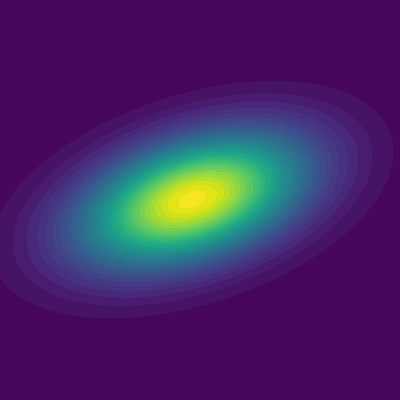

In [130]:
i = 1
# Only show 2 dims
mean = means[i][1:3]
cov = (Fs[i] @ Fs[i].T + np.diag(np.exp(log_covs[i])))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
# plt.savefig('../slide-figures/FA_before_avg2.png')

<IPython.core.display.Javascript object>


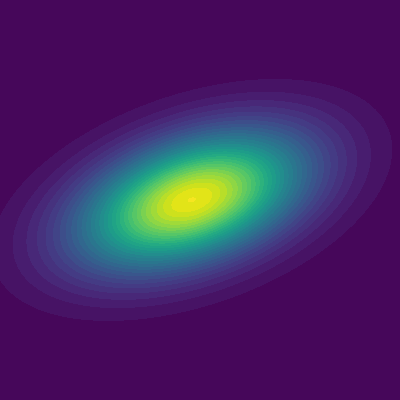

In [131]:
i = 2
# Only show 2 dims
mean = means[i][1:3]
cov = (Fs[i] @ Fs[i].T + np.diag(np.exp(log_covs[i])))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
# plt.savefig('../slide-figures/FA_before_avg3.png')

<IPython.core.display.Javascript object>


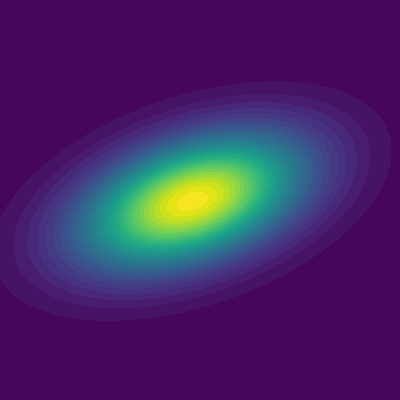

In [132]:
i = 3
# Only show 2 dims
mean = means[i][1:3]
cov = (Fs[i] @ Fs[i].T + np.diag(np.exp(log_covs[i])))[1:3, 1:3]

# Plot the Gaussian

fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-18:18:.1, -18:18:.1]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(mean=mean, cov=cov)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
# plt.savefig('../slide-figures/FA_before_avg4.png')

### VGI vs VGI shared

In [14]:
suite = {
    'EM (Complete)': 'fa_em_complete',
    'VGI individual': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
    'VGI shared': 'fa_pretrained_svar_cdi',
    'VGI shared extended': 'fa_pretrained_svarrlx_cdi',
}
groups = [1, 2, 3, 4, 5]

In [15]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
                                         checkpoints='last')

<IPython.core.display.Javascript object>


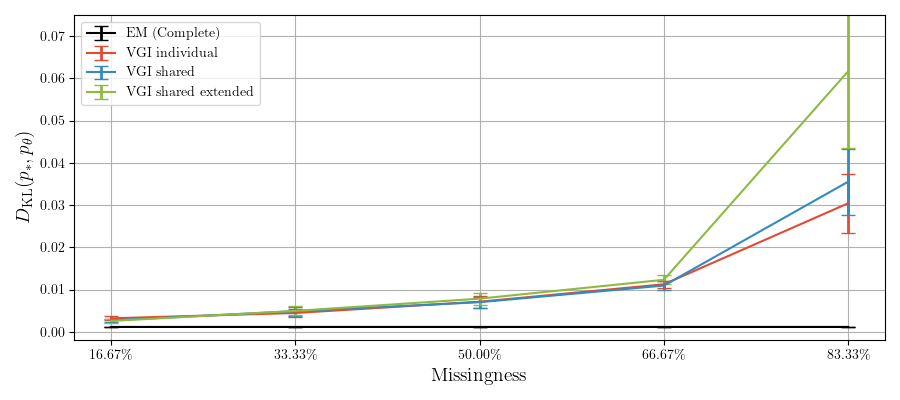

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors[:2] + ['#348ABD', '#8EBA42'],
                ylim=(-0.002, 0.075))

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

# fig.tight_layout(rect=(0, 0, 1, 0.93))

# axes.legend(ncol=5, bbox_to_anchor=(0.5, 0.95), bbox_transform=fig.transFigure, loc='center', 
#                   frameon=False)
axes.legend(ncol=1, loc='upper left', frameon=True)

In [17]:
# fig.savefig('figures/toy_mcar_kldiv_individual_vs_shared.pdf', bbox_inches='tight')